In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Lab 5 -- Transiting exoplanet from TESS



In this lab we will explore the transit method for detecting and characterizing extrasolar planets, using real data from the TESS mission

In [2]:
# load the data and print out variable names
f = fits.open('hlsp_qlp_tess_ffi_s0026-0000000157586003_tess_v01_llc.fits')
print(f.info())
print(f[1].data.names)

Filename: hlsp_qlp_tess_ffi_s0026-0000000157586003_tess_v01_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU     65   1148R x 13C   [D, J, E, E, E, J, J, E, E, E, E, E, E]   
None
['TIME', 'CADENCENO', 'SAP_FLUX', 'KSPSAP_FLUX', 'KSPSAP_FLUX_ERR', 'QUALITY', 'ORBITID', 'SAP_X', 'SAP_Y', 'SAP_BKG', 'SAP_BKG_ERR', 'KSPSAP_FLUX_SML', 'KSPSAP_FLUX_LAG']


### 1. Sample TESS transit light curve

The data are stored in the "LIGHTCURVE" portion of the FITS file, with 
variable names listed above. Looking at those, choose one that you think could represent the flux of the star vs time and write its name as flux_variable_name below. If there is more than one thing you think might be right try them out and see which one makes the most sensible plot!

In [16]:
# variable name 
flux_variable_name='KSPSAP_FLUX_SML'

### 2. Identify and mark transit signatures

The plot below should make a light curve (flux of the star vs time).

Identify (by eye is fine) and mark any promising transit signals (periodic drops in brightness) on the light curve plot. Fill in the time in days of the first transit, the period, and the depth of the signal in the variables below and then run the code to mark the transits on the plot.


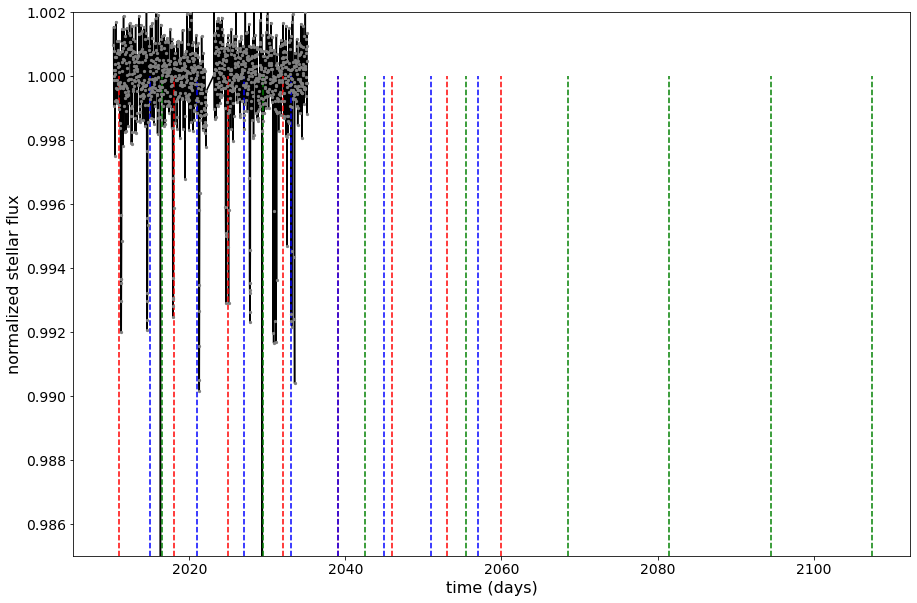

In [133]:
time_variable=f[1].data.field('TIME')
flux_variable=f[1].data.field(flux_variable_name)

fig = plt.figure(figsize=(15,10))
plt.plot(time_variable,flux_variable,color='k')
plt.scatter(time_variable,flux_variable,color='grey',s=5,zorder=3,marker='o')
plt.ylim(0.985,1.002)

plt.xlabel('time (days)',fontsize=16); plt.ylabel('normalized stellar flux',fontsize=16)

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# 
zero_transit_time=2010
period0=0#days?
depth0=0
for i in range(8):
    plt.plot(zero_transit_time+i*period0+np.zeros(50),depth0*np.arange(50)/49.+(1.-depth0),linestyle='--',color='red')

third_transit_time=2011
period1=7#days?
depth1=0.9903
for i in range(8):
    plt.plot(third_transit_time+i*period+np.zeros(50),depth*np.arange(50)/49.+(1.-depth),linestyle='--',color='red')

    

    
second_transit_time=2015
period2=6#days?
depth2=0.9885
for i in range(8):
    plt.plot(second_transit_time+i*period2+np.zeros(50),depth2*np.arange(50)/49.+(1.-depth2),linestyle='--',color='blue')

first_transit_time=2016.5
period3=13#years
depth3=0.9850
for i in range(8):
    plt.plot(first_transit_time+i*period3+np.zeros(50),depth3*np.arange(50)/49.+(1.-depth3),linestyle='--',color='green')

I feel like there are 3 objects that can be classified as planets since, as you can see there are three significant times the flux decreases by relatively a lot; Compared to the normal flux fluctuations that is. The red line has 3 iterations of periodical dip, the blue has 3 as well, but the Green line has a period roughly around 14 days, hence only appears twice. I picked the green transit because its dip is bigger.

### 3. Transit duration and depth

Use the plot below to zoom in on one of the transits and measure its duration + depth.

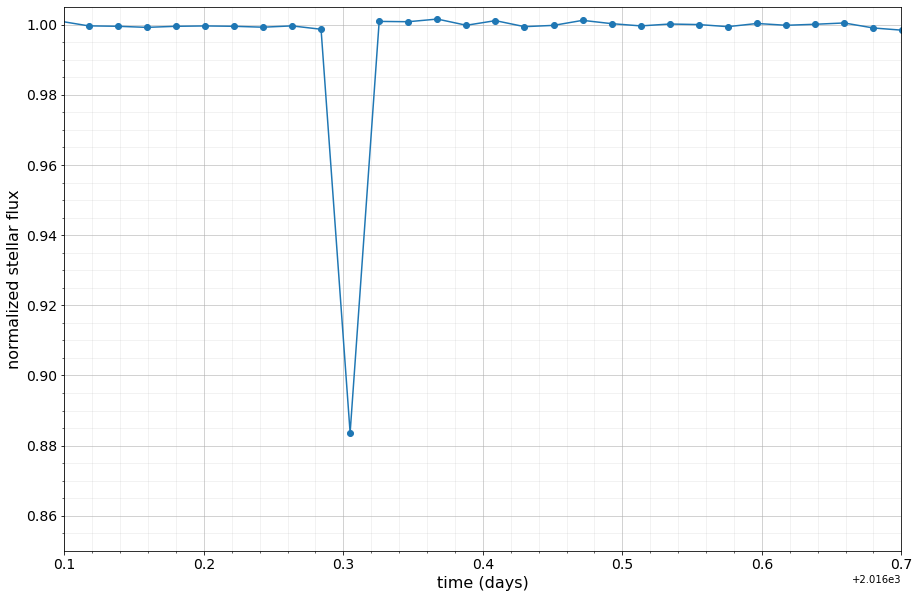

In [134]:
fig = plt.figure(figsize=(15,10))

plt.plot(time_variable,flux_variable,marker="o")
plt.ylim(0.85,1.005)

plt.xlabel('time (days)',fontsize=16); plt.ylabel('normalized stellar flux',fontsize=16)

ax = plt.gca()
ax.yaxis.set_tick_params(labelsize=14);ax.xaxis.set_tick_params(labelsize=14)
plt.grid(b=True,which='minor',alpha=0.2);plt.grid(b=True,which='major',alpha=0.7)
plt.minorticks_on()
plt.xlim(first_transit_time-0.4,first_transit_time+0.2)
ax.xaxis.grid(True,which='minor')


The units in the x axis is 0.2, 0.3 or ..., plus 2016. Plus 2016 because we only care about local transit
Duration: 2016.33 - 2016.28 = 0.05
###  estimated duration: 0.05 days
###  estimated depth:1-0.882= 0.118

### 4. The radius of the exoplanet

Write an equation for the radius of the exoplanet. What quantity does it depend on that we haven't measured from the transit light curve? [*Hint*: what ratio should the amount of light blocked depend on?]

Find the needed information in the FITS file header below, and solve for the radius of the planet in units of Earth radii.

In [135]:
print(f[0].header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  NEXTEND =                    1 / number of standard extensions                  EXTNAME = 'PRIMARY '           / name of extension                              ORIGIN  = 'MIT/QLP '           / institution responsible for creating this file TELESCOP= 'TESS    '           / telescope                                      INSTRUME= 'TESS Photometer'    / detector type                                  FILTER  = 'TESS    '           / the filter used for the observations           OBJECT  = 'TIC 157586003'      / string version of TICID                        TICID   =            157586003 / unique TESS target identifier                  SECTOR  =                   26 / last ob

In [136]:
import math
#Delta(F)=(Radius_p^2)
#    /         /
#    F     (Radius_star^2)    where F is taken as 1 in this case


            #{stellar mass of star^2} * {flux^2}
R_planet=math.sqrt(((11790932310)**2) * (0.882**2)/1)
print(R_planet," cm")
# the output is in centimeters, after comparing it to the earth radius I got a proportion of 16.3
#hence
Rearth=637813999.772#cm
R_planet_wrt_earth=R_planet/Rearth
print(R_planet_wrt_earth," times of earth Radii, is allegedly the exoplanet's radii")

10399602297.42  cm
16.305070602303424  times of earth Radii, is allegedly the exoplanet's radii


### 5. Transit duration and orbital semi-major axis

Use your measured transit duration and period to solve for the semi-major axis of the binary orbit. Express your answer in terms of the Earth-Sun distance 1AU = 1.5x10^13 cm. You may assume that the inclination is exactly edge-on ($i = 90^\circ$), although note that we do not know that here! [*Hint*: how far does the exoplanet travel during the transit?]

Using the semi-major axis and Kepler's 3rd law, solve for the total mass of the system in solar masses. [Note: if you see the mass reported in the header above and are confused by the large discrepancy...so am I. It's definitely wrong so don't be distracted by it].

In [137]:
Rad_star=1.69*(6.957*10**10)#cm
m_star=(1.05*2*10**30)
Transtime=0.05*86400
Period=13*24*3600
Vel_planet=2*Rad_star/Transtime
orbit_cir=Period*Vel_planet
a=orbit_cir/np.pi
#assuming this is a ellipse where the
a=a
print("semi major axis:",a)
G=6.67*10**(-11)

M_total=(4*(np.pi**2)*(a**3))/(G*(Period**2))
print("The mass of the system is", M_total,"grams")

semi major axis: 19460866745451.39
The mass of the system is 3.45785079715297e+39 grams


### 6. Planet mass from the radial velocity

This system also has radial velocity measurements, which show a line of sight velocity amplitude of $0.04$ km s$^{-1}$. Solve for the mass of the planet (in units of solar masses), assuming it is much smaller than that of its host star. [*Hint*: recall the binary mass function!]

In [138]:
#I couldnt Find the binary mass function so i used from the internet, 
#which I thought looked promising.I apologize.
mass_planet=(m_star**2)*((4*np.pi**2)/(Period**2)*G)
actualmassplanet=mass_planet**(1/3)
print(actualmassplanet, "is the mass of the planet in grams")
print( "1.05e-20 solar masses is the mass of the planet ")

20957364014423.094 is the mass of the planet in grams
1.05e-20 solar masses is the mass of the planet 


### 7. Daytime temperature

Given the effective temperature of the star above, how would the daytime temperature of the planet compare to that of Earth? [*Hint*: if you assume the only thing heating the planet is the incident starlight, what should this ratio depend on?]


> The effective temperature of the star is around the same as our sun, but is more massive in mass and size. The planet is less massive than earth but has the potetnial to be a medium-big sized planet. My final mass  of the planet might be a little off too. Now, assuming that the radius of the planet is bigger, It takes in more flux through a star more massive than our sun. This would mean surface temperature is higher. But in the case where its farther than the earths orbit from its parent star, The surface temp would be lesser; Flux decreases exponetially with respect to distance.


### 8. Characterize the star - exoplanet system

Using your results above, how do the properties of this extrasolar planet compare to those in the Solar system? Which planet is it most similar to in radius and mass? Is its orbital location similar to where that planet is found in the Solar system?

Properties of solar system planets are listed e.g. at this link
https://nssdc.gsfc.nasa.gov/planetary/factsheet/

Since we are assuming That the size is bigger but the mass may not be as high. Density and size-wise, it could possibly look like Jupiter or Saturn. but mass wise probably pluto.
Which seemslike a huge anomaly.Almost like the whole planet is just loose gas .

Orbit wise I would say it is the closest to Mars's location. When calulated with respect to semi major axis, It'll give us around 1.4 AU so... Mars.

